In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data

# Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [2]:
#Load dataset and explore

In [3]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#look at null values, 11 of them in TotalCharges, so drop nulls
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.dropna()

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

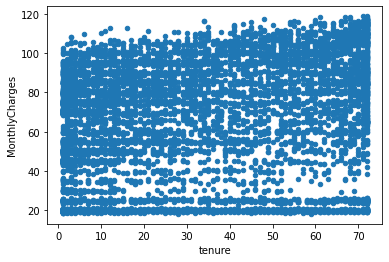

In [7]:
df.plot.scatter(y = 'MonthlyCharges', x = 'tenure')

- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between tenure and MonthlyCharges.

In [8]:
#how does tenure correlate w/ monthly charges?
x = df.tenure
y = df.MonthlyCharges

r, p = stats.pearsonr(x , y)
print(f' Pearson is {r:.3f} and p-value at {p:.3f}') #since p is less than alpha, reject null

 Pearson is 0.247 and p-value at 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure and TotalCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between tenure and TotalCharges.

In [9]:
#how does tenure correlate w/ total charges?
x = df.tenure
y = df.TotalCharges

r, p = stats.pearsonr(x , y)
print(f'Pearson is {r:.3f} and p-value  is {p:.3f}') #since p is less than alpha, reject null

Pearson is 0.826 and p-value  is 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between phone service tenure and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between phone tenure and MonthlyCharges.

In [16]:
#What happens if you control for phone and internet?
# make new dfs for control measures

#subset tenure and PhoneService by Yes and No

x_phone_tenure = df['tenure'][df['PhoneService'] == 'Yes']
x_phone_total = df['TotalCharges'][df['PhoneService'] == 'Yes']
y_phone_monthly = df['MonthlyCharges'][df['PhoneService'] == 'Yes']

x_no_phone_tenure = df['tenure'][df['PhoneService'] == 'No']
x_no_phone_total = df['TotalCharges'][df['PhoneService'] == 'No']
y_no_phone_monthly = df['MonthlyCharges'][df['PhoneService'] == 'No']

In [17]:
#get Pearson r of phone tenure for Yes

r, p = stats.pearsonr(x_phone_tenure, y_phone_monthly)
print(f' Pearson is {r:.3f} and p-value is {p:.3f}') #since p-value lower than alpha, reject null

 Pearson is 0.244 and p-value is 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between phone total and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between phone total and MonthlyCharges.

In [18]:
#tenure vs TotalCharges

r, p = stats.pearsonr(x_phone_total, y_phone_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #since p-value is lower than alpha, reject null

Pearson is 0.646 and p-value is 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between tenure of customers without phone service and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between tenure of customers without phone service and MonthlyCharges.

In [19]:
#no phone tenure vs no phone MonthlyCharges

r, p = stats.pearsonr(x_no_phone_tenure, y_no_phone_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #since p-value is less than alpha, reject null

Pearson is 0.592 and p-value is 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between the total charges of customers without phone service and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between the total charges of customers without phone service and MonthlyCharges.

In [20]:
#no phone total vs no phone MonthlyCharges

r, p = stats.pearsonr(x_no_phone_total, y_no_phone_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #since p-value is less than alpha, reject null

Pearson is 0.747 and p-value is 0.000


- $\alpha = .05$
- $H_0$: There is no linear relationship between DSL internet service and MonthlyCharges. (Pearson-r JUST cares about linearity)
- $H_a$: There is a linear relationship between DSL internet service and and MonthlyCharges.

In [21]:
#internet service subsetting DSL

x_dsl_tenure = df['tenure'][df['InternetService'] == 'DSL']
x_dsl_total = df['TotalCharges'][df['InternetService'] == 'DSL']
y_dsl_monthly = df['MonthlyCharges'][df['InternetService'] == 'DSL']

In [37]:
#internet service subsetting Fiber Optic
x_fo_tenure = df['tenure'][df['InternetService'] == 'Fiber optic']
x_fo_total = df['TotalCharges'][df['InternetService'] == 'Fiber optic']
y_fo_monthly = df['TotalCharges'][df['InternetService'] == 'Fiber optic']

In [24]:
#internet subsetting, No internet Service

x_no_is_tenure = df['tenure'][df['InternetService'] == 'No']
x_no_is_total = df['TotalCharges'][df['InternetService'] == 'No']
y_no_is_monthly = df['MonthlyCharges'][df['InternetService'] == 'No']

In [26]:
#DSL tenure and monthly charges

r, p = stats.pearsonr(x_dsl_tenure, y_dsl_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #p-value lower than alpha, reject the null
#moderate positve correlation

Pearson is 0.520 and p-value is 0.000


In [27]:
#DSL total versus monthly

r, p = stats.pearsonr(x_dsl_total, y_dsl_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #p-value lower than alpha, reject null
#strong positive correlation

Pearson is 0.718 and p-value is 0.000


In [ ]:
#get fiber optic value counts bc was getting error, it's 'Fiber optic', not 'Fiber Optic' 小問題

df[df['InternetService'] == 'Fiber optic'].value_counts().sum() #3096

In [44]:
#Fiber optic tenure versus monthly 
r, p = stats.pearsonr(x_fo_tenure, y_fo_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #reject null bc p-value lower than alpha
#strong positive correlation

Pearson is 0.985 and p-value is 0.000


3096

In [47]:
#no internet service tenure versus monthly

r, p = stats.pearsonr(x_no_is_tenure, y_no_is_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #p-value lower than alpha, reject null
#weak positive correlation

Pearson is 0.346 and p-value is 0.000


In [49]:
#no internet service total v monthly
r, p = stats.pearsonr(x_no_is_total, y_no_is_monthly)
print(f'Pearson is {r:.3f} and p-value is {p:.3f}') #p-value lower than alpha, reject null

#moderate positive correlation

Pearson is 0.484 and p-value is 0.000


Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?
    Is there a relationship between how long an employee has been with the company and the number of titles they have had?


Use the sleepstudy data. Is there a relationship between days and reaction time?

In [54]:
from pydataset import data
df = data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [55]:
df

AttributeError: 'NoneType' object has no attribute 'head'